# NAME: Luke Nelson
# STUDENT ID: 5281493709

# HOMEWORK 1

# a) Download the Vertebral Column Data Set

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn import neighbors
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
new_p=os.path.normpath(os.getcwd() + os.sep + os.pardir)    #The parent Directory homework1
new_p_dat=os.path.join(new_p,'Data')    #The folder "Data"
new_p_dat2=os.path.join(new_p_dat,'vertebral_column_data')
os.chdir(new_p_dat2)    #Change cd to be the Output folder so that we can save html there
df=pd.read_table('column_2C.dat',header=None, sep="\s+")   #Read in the .dat file
#Add column names
df.columns=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','grade_of_spondylolisthesis','label']
#Create new column for class as specified in the instructions. NO=0; AB=1
conditions=[df['label']=='NO',df['label']=='AB']
choices=[0,1]
df['class']=np.select(conditions, choices, default='NA')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1


# b) Pre-Processing and Exploratory data analysis:

## i) Make scatterpolots of the independent variables in the dataset. Use color to show Classes 0 and 1

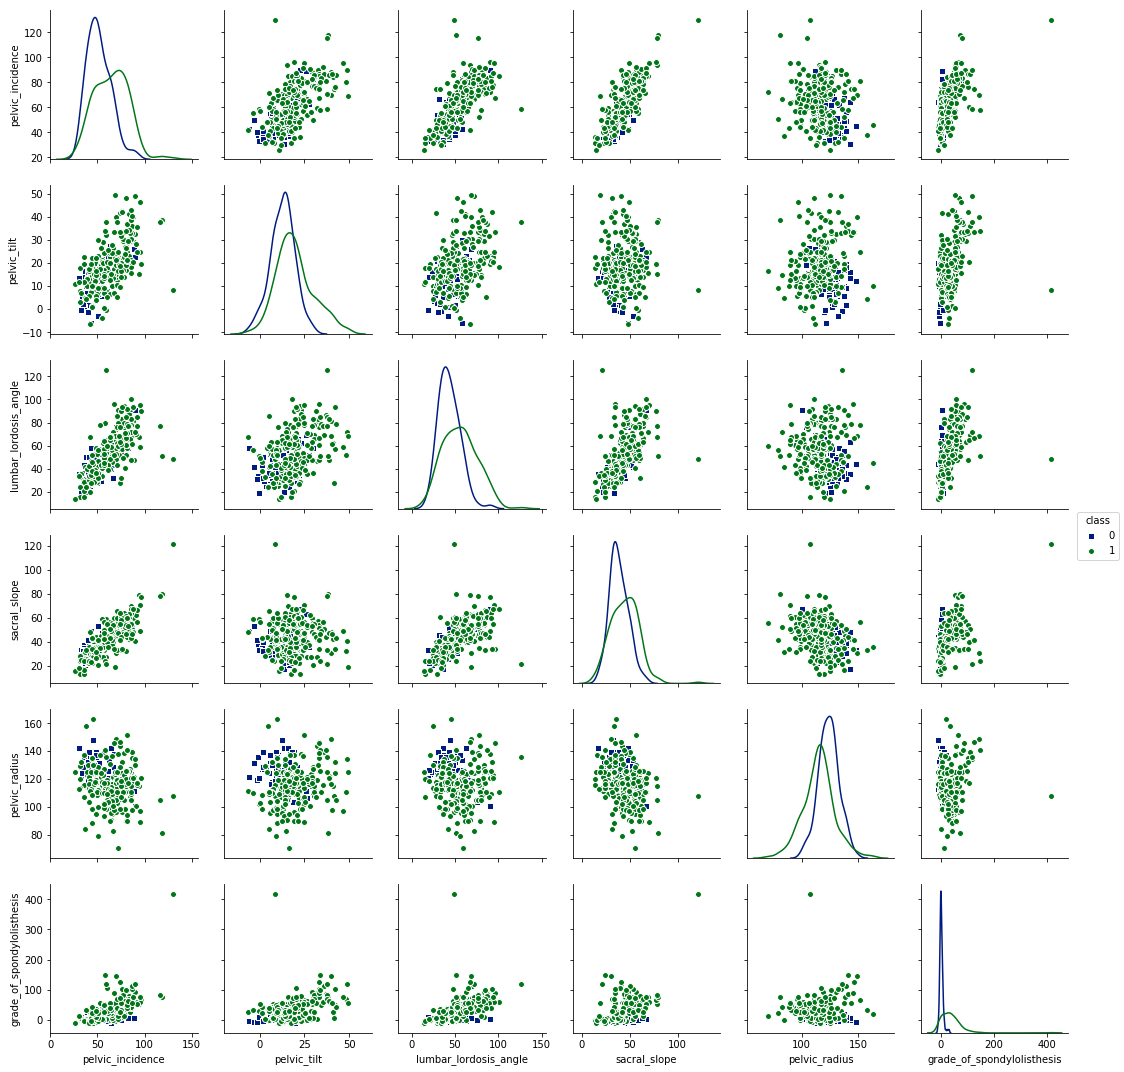

In [3]:
g1 = sns.pairplot(df, 
                 vars=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','grade_of_spondylolisthesis'],
                hue='class',
                markers=['s','o'],
                diag_kind='kde',
                 palette='dark')




##    ii) Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

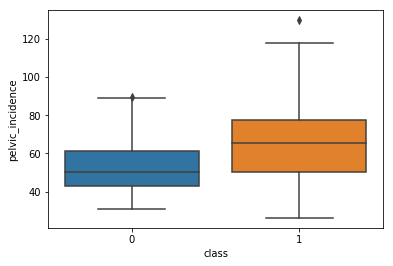

In [4]:
#'pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','grade_of_spondylolisthesis'

#Pelvic Incidence
g_pi=sns.boxplot(y=df['pelvic_incidence'],
                x=df['class'])
                

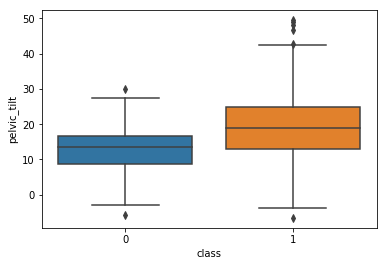

In [5]:
#Pelvic Tilt
g_pt=sns.boxplot(y=df['pelvic_tilt'],
                x=df['class'])

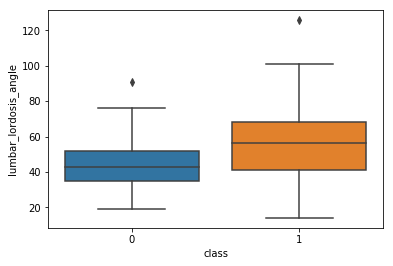

In [6]:
#lumbar_lordosis_angle
g_lla=sns.boxplot(y=df['lumbar_lordosis_angle'],
                x=df['class'])

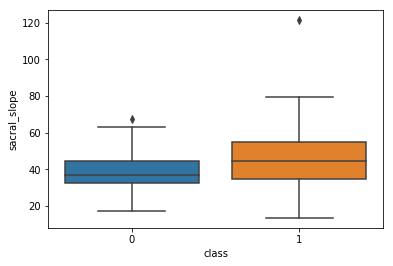

In [7]:
#sacral_slope
g_ss=sns.boxplot(y=df['sacral_slope'],
                x=df['class'])

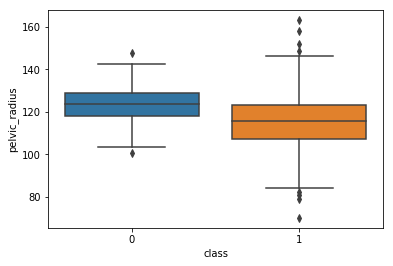

In [8]:
#pelvic_radius
g_ss=sns.boxplot(y=df['pelvic_radius'],
                x=df['class'])

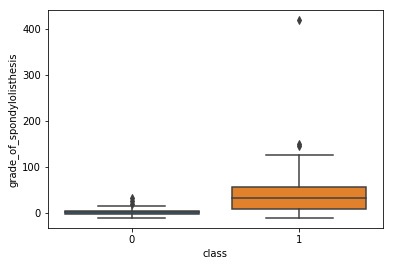

In [9]:
#grade_of_spondylolisthesis
g_ss=sns.boxplot(y=df['grade_of_spondylolisthesis'],
                x=df['class'])

##    iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [10]:
#use scikit train_test_split to do this

#Create two new dataframes. One consisting of Class 0, the other consisting of Class 1
NO_df=df[df['label']=='NO']    #Class 0
AB_df=df[df['label']=='AB']    #Class 1

#Create train and test sets for Class 0. Take the first 70 rows
NO_train, NO_test, NO_label_train, NO_label_test=model_selection.train_test_split(NO_df.iloc[:,0:6],NO_df.iloc[:,7:], train_size=70,shuffle=False)

#Create train and test sets for Class 1. Take the first 140 rows
AB_train, AB_test, AB_label_train, AB_label_test=model_selection.train_test_split(AB_df.iloc[:,0:6],AB_df.iloc[:,7:], train_size=140,shuffle=False)

#Combine Dataframes so we have test and training and labels for for both clsases in the same frame
#Combine Dataframes
train=pd.concat([NO_train,AB_train])
train_labels=pd.concat([NO_label_train,AB_label_train])
train_labels=np.ravel(train_labels)

test=pd.concat([NO_test,AB_test])
test_labels=pd.concat([NO_label_test,AB_label_test])
test_labels=np.ravel(test_labels)

/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### The training set has been saved as the variables train and train_labels. The test set has been saved in the variables test and test_labels. I have printed them below for your reference.

In [11]:
print('train:',train)
print('train_labels:',train_labels)
print('test:',test)
print('test_labels:',test_labels)

train:      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210             38.51        16.96                  35.11         21.54   
211             54.92        18.97                  51.60         35.95   
212             44.36         8.95                  46.90         35.42   
213             48.32        17.45                  48.00         30.87   
214             45.70        10.66                  42.58         35.04   
215             30.74        13.35                  35.90         17.39   
216             50.91         6.68                  30.90         44.24   
217             38.13         6.56                  50.45         31.57   
218             51.62        15.97                  35.00         35.66   
219             64.31        26.33                  50.96         37.98   
220             44.49        21.79                  31.47         22.70   
221             54.95         5.87                  53.00         49.09   
222             56

# c) Classification using KNN on Vertebral Column Data Set

##    i) Write code for k-nearest neighbors with Euclidean metric (or use a software package)

#### I am using scikit learn's neighbors.KNeighborsClassifier and have specified the Euclidean metric. Below is an example of the code. You will see it in use below as I answer question (c)ii through (f). I have also created a function to run the classifier below as the same steps occurs many times throughout the assignment.

In [12]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(train, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

##    ii) Test all the data in the test database with k nearest neighbors. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*.

In [13]:
def run_classifier(kmin, kmax, kinterval, choose_metric, choose_train, choose_train_labels, choose_test, choose_test_labels, choose_weights):
    train_errors=list()
    test_errors=list()
    
    k_vals=np.arange(kmin,kmax+kinterval,kinterval)
    k_vals=np.flip(k_vals,0)
    
    for i in k_vals:
        knn = neighbors.KNeighborsClassifier(n_neighbors=i, metric=choose_metric, weights=choose_weights)
        knn.fit(choose_train, choose_train_labels)
        train_pred=knn.predict(choose_train)
        train_err=1-metrics.accuracy_score(choose_train_labels, train_pred)
        train_errors.append(train_err)
        
        test_pred=knn.predict(choose_test)
        test_err=1-metrics.accuracy_score(choose_test_labels, test_pred)
        test_errors.append(test_err)
        
    #Locate the k value with the lowest test error rate
    a=np.array(test_errors)
    find_index=np.where(a==a.min())
    print('The minimum test error is:',min(test_errors))
    print('This test error is produced by the following k values:')
    for j in find_index:
        k_star=k_vals[j]
        print(k_star)

    b=np.array(train_errors)
    find_index2=np.where(b==b.min())
    print('The minimum train error is:',min(train_errors))
    print('This train error is produced by the following k values:')
    for q in find_index2:
        k_star2=k_vals[q]
        print(k_star2)
        
    #Plot
    fig, ax = plt.subplots()
    ax.plot(k_vals, train_errors, 'b-', label='Training Error')
    ax.plot(k_vals, test_errors, 'g-', label='Testing Error')
    ax.set_xlim(kmax, 0)  # decreasing time
    leg = ax.legend()
    ax.set_xlabel('k')
    ax.set_title('Error Rates vs. k Values')
    ax.set_ylabel('Error Rate')
    ax.grid(True)
    

#### I wrote the function above "run_classifier" after realizing I would be carrying out the same steps a number of times throughout the homework. This function is used throughout the rest of the homework.

The minimum test error is: 0.06000000000000005
This test error is produced by the following k values:
[4]
The minimum train error is: 0.0
This train error is produced by the following k values:
[1]


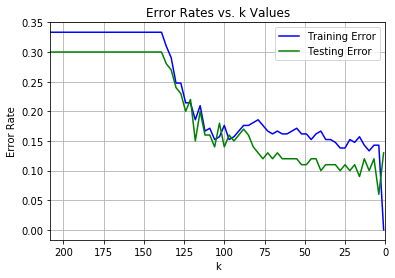

In [14]:
run_classifier(1,208,3,'euclidean',train, train_labels, test, test_labels, 'uniform')

In [15]:
#Calculate the confusion matrix for k_star
knn = neighbors.KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(train, train_labels)
test_pred=knn.predict(test)
cmat=metrics.confusion_matrix(test_labels, test_pred)
print('Confusion Matrix:\n',cmat)

Confusion Matrix:
 [[25  5]
 [ 1 69]]


In [16]:
#Calculating Metrics
#TN = C 0,0
#FN = C 1,0
#TP = C 1,1
#FP = C 0,1

#True Negative Rate (Specificity) = TN/(TN+FP)
tnr=cmat[0,0]/(cmat[0,0]+cmat[0,1])
print('True Negative Rate:',tnr)

#True Positive Rate (Recall or Sensitivity) = TP/(TP+FN)
tpr=cmat[1,1]/(cmat[1,1]+cmat[1,0])
print('True Positive Rate:',tpr)

#Precision = TP/(TP+FP)
precision=cmat[1,1]/(cmat[1,1]+cmat[0,1])
print('Precision:',precision)

#F1_Score = F1 = 2 * (precision * recall) / (precision + recall)
fscore=2*(precision*tpr)/(precision+tpr)
print('F-1 Score:', fscore)

True Negative Rate: 0.8333333333333334
True Positive Rate: 0.9857142857142858
Precision: 0.9324324324324325
F-1 Score: 0.9583333333333333


#### (c) ii. Answer:<br>
The most suitable k* among the values of k is 4.<br>
The confusion matrix is as follows:<br>
[[25 5] <br>
[1 69]] <br>
<br>
Metrics:<br>
True Negative Rate: 0.8333333333333334<br>
True Positive Rate: 0.9857142857142858<br>
Precision: 0.9324324324324325<br>
F-1 Score: 0.9583333333333333<br>

##    iii) Since the computation time depends on the size of the training set, one may only use a subset of the training set..... This plot is called a Learning Curve.

In [17]:
#Loop through N, creating a new training set for each N
#Then get the testing error rate
#Choose the k that yields the lowest error rate and keep in plot (append to list)

#Create set N
n=np.arange(10,220,10)


#Loop through N, creating a new training set for each N
#Then get the testing error rate
#Choose the k that yields the lowest error rate and keep in plot (append to list)

best_k=list()
best_test_error=list()
train_errors2=list()

for v in n:
    
    k_vals_2=np.arange(1,v,5)
    
    #Create train and test sets for Class 0. Take the first N/3 rows
    NO2_train, NO2_test, NO2_label_train, NO2_label_test=model_selection.train_test_split(NO_df.iloc[:,0:6],NO_df.iloc[:,7:], train_size=int(v/3),shuffle=False)

    #Create train and test sets for Class 1. Take the first N-(N/3) rows
    AB2_train, AB2_test, AB2_label_train, AB2_label_test=model_selection.train_test_split(AB_df.iloc[:,0:6],AB_df.iloc[:,7:], train_size=v-int(v/3),shuffle=False)
    
    #Combine Dataframes
    train2=np.concatenate((NO2_train,AB2_train))
    train2_labels=np.concatenate((NO2_label_train,AB2_label_train))
    train2_labels=np.ravel(train2_labels)
    
    #Testing Error Rate
    tempk=list()
    temperror=list()
    for i in k_vals_2:        
        knn2 = neighbors.KNeighborsClassifier(n_neighbors=i, metric='euclidean')
        knn2.fit(train2, train2_labels)
        test_pred=knn2.predict(test)
        test_err=1-metrics.accuracy_score(test_labels, test_pred)
        tempk.append(i)
        temperror.append(test_err)
        train_pred=knn2.predict(train2)
        train_err=1-metrics.accuracy_score(train2_labels, train_pred)
        train_errors2.append(train_err)
    
    index2=temperror.index(min(temperror))
    k_star2=tempk[index2]
    error_star=min(temperror)
    best_k.append(k_star2)
    best_test_error.append(error_star)
    
    

/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


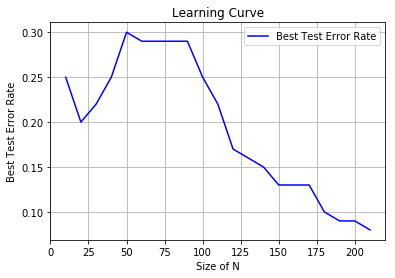

In [18]:
#Plot
fig2, ax2 = plt.subplots()
ax2.plot(n, best_test_error, 'b-', label='Best Test Error Rate')
#ax2.plot(n, best_k, 'g-', label='k values')
leg2=ax2.legend()
ax2.set_xlabel('Size of N')
ax2.set_title('Learning Curve')
ax2.set_ylabel('Best Test Error Rate')
ax2.grid(True)

In [19]:
d_iii={'N':n,'Optimal k':best_k,'Test Error Rate':best_test_error}
df_iii=pd.DataFrame(d_iii)
df_iii

,N,Optimal k,Test Error Rate
0,10,1,0.25
1,20,6,0.20
2,30,1,0.22
3,40,11,0.25
4,50,26,0.30
5,60,21,0.29
6,70,26,0.29
7,80,31,0.29
8,90,41,0.29
9,100,6,0.25


#### (c) iii. Answer: <br>
Please see the Learning Curve plotted above. <br>
I've included a dataframe above which includes optimal k values and their respective Test Error Rates for the various sizes of N. Note that for each value N there may be multiple optimal k values with a tie for minimum test error rate. I've simply included the first instance of the k-value (lowest k value) in each case within the dataframe.<br>



# d) Replace the Euclidean metric with the following metrics and test them

##    i. Minkowski Distance

###        A. Which becomes Manhattan Distance with p=1

Manhattan Distance:
The minimum test error is: 0.10999999999999999
This test error is produced by the following k values:
[26 11  6]
The minimum train error is: 0.0
This train error is produced by the following k values:
[1]


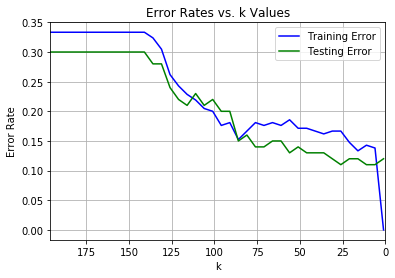

In [20]:
#Manhattan Distance
print('Manhattan Distance:')
run_classifier(1,196,5,'manhattan',train, train_labels, test, test_labels, 'uniform')

#### (d) i. A. Answer: <br>
The best k for Manhattan distance is 6, 11, and 26. However, as you will see below, when k is 6 it results in the lowest test error rate for Question (d) i. B. So we will go with k*=6. You will see in my code below that we test for the three aforementioned k values.

###        B. with Minkowski go through the set of log base 10 (p)......

In [21]:
#Minkowski: 4
#maybe test for other values of k in order to do a tie break

#Create a list of potential k values
k_vals4=[6,11,26]

#Create list of potentisl p values
p=np.arange(.1,1.1,.1)
p_vals4=list()
for i in p:
    p2=10**i
    p_vals4.append(p2)


#Create list for test errors
test_errors4=list()
train_errors4=list()
    
#Testing Error Rate
for j in p_vals4:
    knn4 = neighbors.KNeighborsClassifier(n_neighbors=6, metric='minkowski',p=j)
    knn4.fit(train, train_labels)
    test_pred=knn4.predict(test)
    test_err=1-metrics.accuracy_score(test_labels, test_pred)
    test_errors4.append(test_err)
    train_pred=knn4.predict(train)
    train_err=1-metrics.accuracy_score(train_labels, train_pred)
    train_errors4.append(train_err)

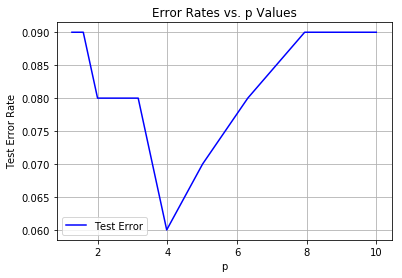

In [22]:
#Plot 4
fig4, ax4 = plt.subplots()
ax4.plot(p_vals4, test_errors4, 'b-', label='Test Error')
leg4 = ax4.legend()
ax4.set_xlabel('p')
ax4.set_title('Error Rates vs. p Values')
ax4.set_ylabel('Test Error Rate')
ax4.grid(True)

In [23]:
#Find p* where test error rate is at a minimum
index4=test_errors4.index(min(test_errors4))
p_star4=p_vals4[index4]
print('The most suitable p among the values in p_vals4 is:', p_star4)
print('This corresponds to a Log base 10 of p of 0.6')
print('The minimum test error rate at this p value is:',min(test_errors4))

The most suitable p among the values in p_vals4 is: 3.9810717055349722
This corresponds to a Log base 10 of p of 0.6
The minimum test error rate at this p value is: 0.06000000000000005


#### (d) i. B. Answer:<br>
I used k*=6 for this question because after testing values of 6,11,and 26, a k value of 6 yielded the lowest test error for the Minkowski distance.<br>
The most suitable p is: 3.9810717055349722<br>
This corresponds to a Log base 10 of p of 0.6

###        C. Chebyshev

Chebyshev Distance:
The minimum test error is: 0.07999999999999996
This test error is produced by the following k values:
[16]
The minimum train error is: 0.0
This train error is produced by the following k values:
[1]


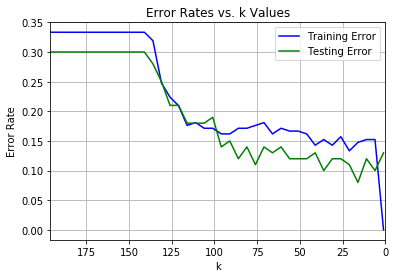

In [24]:
#Chebyshev Distance
print('Chebyshev Distance:')
run_classifier(1,196,5,'chebyshev',train, train_labels, test, test_labels, 'uniform')

#### (d) i. C. Answer: <br>
The best k for Chebyshev distance is 16.<br>
This k results in a test error of 0.08

###    ii. Mahalanobis Distance

In [25]:
#Mahalanobis Distance: 
#Create a list of potential k values
k_vals6=np.arange(1,201,5)


#Create list for test errors
test_errors6=list()
train_errors6=list()



#Testing Error Rate
for i in k_vals6:
    knn6 = neighbors.KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', metric_params={'V':np.cov(train, rowvar=False)})
    knn6.fit(train, train_labels)
    test_pred=knn6.predict(test)
    test_err=1-metrics.accuracy_score(test_labels, test_pred)
    test_errors6.append(test_err)
    train_pred=knn6.predict(train)
    train_err=1-metrics.accuracy_score(train_labels, train_pred)
    train_errors6.append(train_err)
    

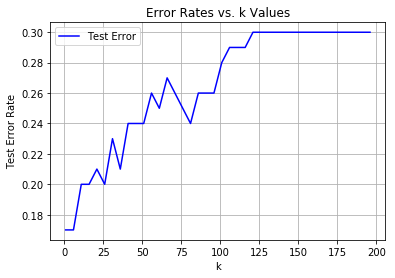

In [26]:
#Plot 6
fig6, ax6 = plt.subplots()
ax6.plot(k_vals6, test_errors6, 'b-', label='Test Error')
leg6 = ax6.legend()
ax6.set_xlabel('k')
ax6.set_title('Error Rates vs. k Values')
ax6.set_ylabel('Test Error Rate')
ax6.grid(True)

In [27]:
#Find k* where test error rate is at a minimum
a=np.array(test_errors6)
find_index=np.where(a==a.min())
print('The minimum test error is:',min(test_errors6))
print('This test error is produced by the following k values:')
for j in find_index:
    k_star=k_vals6[j]
    print(k_star)

The minimum test error is: 0.17000000000000004
This test error is produced by the following k values:
[1 6]


In [28]:
#Calculate the confusion matrix for to determine which k has the higher f1 score
print('For k = 1:')
knn6 = neighbors.KNeighborsClassifier(n_neighbors=1, metric='mahalanobis', metric_params={'V': np.cov(train.T)})
knn6.fit(train, train_labels)
test_pred=knn6.predict(test)
cmat2=metrics.confusion_matrix(test_labels, test_pred)
print('Confusion Matrix:\n',cmat2)

#Calculating Metrics
#TN = C 0,0
#FN = C 1,0
#TP = C 1,1
#FP = C 0,1

#True Negative Rate (Specificity) = TN/(TN+FP)
tnr2=cmat2[0,0]/(cmat2[0,0]+cmat2[0,1])
print('True Negative Rate:',tnr2)

#True Positive Rate (Recall or Sensitivity) = TP/(TP+FN)
tpr2=cmat2[1,1]/(cmat2[1,1]+cmat2[1,0])
print('True Positive Rate:',tpr2)

#Precision = TP/(TP+FP)
precision2=cmat2[1,1]/(cmat2[1,1]+cmat2[0,1])
print('Precision:',precision2)

#F1_Score = F1 = 2 * (precision * recall) / (precision + recall)
fscore2=2*(precision2*tpr2)/(precision2+tpr2)
print('F-1 Score:', fscore2)
print()


print('For k = 6:')
knn6 = neighbors.KNeighborsClassifier(n_neighbors=6, metric='mahalanobis', metric_params={'V': np.cov(train.T)})
knn6.fit(train, train_labels)
test_pred=knn6.predict(test)
cmat2=metrics.confusion_matrix(test_labels, test_pred)
print('Confusion Matrix:\n',cmat2)

#Calculating Metrics
#TN = C 0,0
#FN = C 1,0
#TP = C 1,1
#FP = C 0,1

#True Negative Rate (Specificity) = TN/(TN+FP)
tnr2=cmat2[0,0]/(cmat2[0,0]+cmat2[0,1])
print('True Negative Rate:',tnr2)

#True Positive Rate (Recall or Sensitivity) = TP/(TP+FN)
tpr2=cmat2[1,1]/(cmat2[1,1]+cmat2[1,0])
print('True Positive Rate:',tpr2)

#Precision = TP/(TP+FP)
precision2=cmat2[1,1]/(cmat2[1,1]+cmat2[0,1])
print('Precision:',precision2)

#F1_Score = F1 = 2 * (precision * recall) / (precision + recall)
fscore2=2*(precision2*tpr2)/(precision2+tpr2)
print('F-1 Score:', fscore2)
print()

For k = 1:
Confusion Matrix:
 [[18 12]
 [ 5 65]]
True Negative Rate: 0.6
True Positive Rate: 0.9285714285714286
Precision: 0.8441558441558441
F-1 Score: 0.8843537414965986

For k = 6:
Confusion Matrix:
 [[19 11]
 [ 6 64]]
True Negative Rate: 0.6333333333333333
True Positive Rate: 0.9142857142857143
Precision: 0.8533333333333334
F-1 Score: 0.8827586206896552



#### (d) i. C. Answer: <br>
The best k for Mahalanobis Distance is 1. k values of 1 and 6 result in the same minimum test error rate. However, using a k value of 1 results in a higher F1 Score. <br>
The test error rate produced by k=1 is 0.17

#### Question (d) SUMMARY TABLE:

In [29]:
#Create a Summary Table
summary_data={'Distance':['Manhattan','Minkowski (w/ Log base 10 of p = 0.6)','Chebyshev','Mahalanobis'], 'Best k':[6,6,16,1],'Test Error':[.10999999999999999,0.06000000000000005,0.07999999999999996,0.17000000000000004]}
summary=pd.DataFrame(summary_data, columns=['Distance','Best k','Test Error'])
summary

,Distance,Best k,Test Error
0,Manhattan,6,0.11
1,Minkowski (w/ Log base 10 of p = 0.6),6,0.06
2,Chebyshev,16,0.08
3,Mahalanobis,1,0.17


# (e) The majority polling decision can be replaced by weighted decision...

Euclidean Distance:
The minimum test error is: 0.09999999999999998
This test error is produced by the following k values:
[6]
The minimum train error is: 0.0
This train error is produced by the following k values:
[196 191 186 181 176 171 166 161 156 151 146 141 136 131 126 121 116 111
 106 101  96  91  86  81  76  71  66  61  56  51  46  41  36  31  26  21
  16  11   6   1]


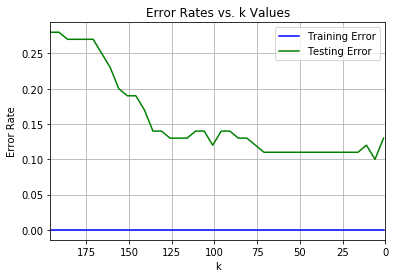

In [30]:
#Euclidean Distance
print('Euclidean Distance:')
run_classifier(1,196,5,'euclidean',train, train_labels, test, test_labels, 'distance')

Manhattan Distance:
The minimum test error is: 0.09999999999999998
This test error is produced by the following k values:
[26]
The minimum train error is: 0.0
This train error is produced by the following k values:
[196 191 186 181 176 171 166 161 156 151 146 141 136 131 126 121 116 111
 106 101  96  91  86  81  76  71  66  61  56  51  46  41  36  31  26  21
  16  11   6   1]


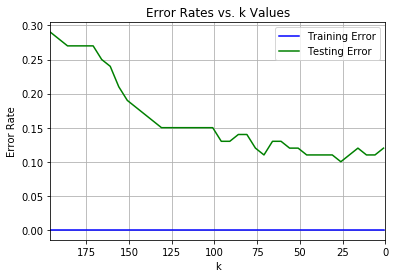

In [31]:
#Manhattan Distance
print('Manhattan Distance:')
run_classifier(1,196,5,'manhattan',train, train_labels, test, test_labels, 'distance')

Chebyshev Distance:
The minimum test error is: 0.10999999999999999
This test error is produced by the following k values:
[61 41 36 31 16]
The minimum train error is: 0.0
This train error is produced by the following k values:
[196 191 186 181 176 171 166 161 156 151 146 141 136 131 126 121 116 111
 106 101  96  91  86  81  76  71  66  61  56  51  46  41  36  31  26  21
  16  11   6   1]


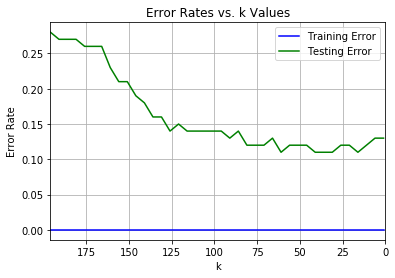

In [32]:
#Chebyshev Distance
print('Chebyshev Distance:')
run_classifier(1,196,5,'chebyshev',train, train_labels, test, test_labels, 'distance')

#### (e) Answer: <br>
The best test errors are as follows:<br>
Euclidean:  0.09999999999999998 <br>
Manhattan:  0.09999999999999998 <br>
Chebyshev:  0.10999999999999999

# (f) What is the lowest training error rate you achieved in this homework?

In [33]:
training_error_concat=train_errors2+train_errors4+train_errors6
ans=min(training_error_concat)
print('The lowest training erorr rate I achieved in this homework was', ans)


The lowest training erorr rate I achieved in this homework was 0.0


#### (f) Answer: <br>
The lowest training error rate I achieved in this homework was 0.0<br>
As you can see throughout the various plots of the asignment, this training error rate was achieved in multiple places